In [13]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
!unzip /content/corn

Archive:  /content/drive/MyDrive/corn.zip
replace corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (451).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (451).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (452).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (453).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (454).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (455).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (456).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (457).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (458).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (459).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (460).jpg  


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/corn/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/corn/val',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 64)      

In [20]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
50/50 [==============================] - 8s 98ms/step - loss: 1.0229 - accuracy: 0.5231 - val_loss: 0.6234 - val_accuracy: 0.6600
Epoch 2/30
50/50 [==============================] - 5s 104ms/step - loss: 0.5357 - accuracy: 0.7631 - val_loss: 0.5018 - val_accuracy: 0.7300
Epoch 3/30
50/50 [==============================] - 5s 90ms/step - loss: 0.4166 - accuracy: 0.8087 - val_loss: 0.3086 - val_accuracy: 0.8650
Epoch 4/30
50/50 [==============================] - 8s 158ms/step - loss: 0.3533 - accuracy: 0.8438 - val_loss: 0.2972 - val_accuracy: 0.8500
Epoch 5/30
50/50 [==============================] - 5s 94ms/step - loss: 0.2847 - accuracy: 0.8662 - val_loss: 0.2838 - val_accuracy: 0.8450
Epoch 6/30
50/50 [==============================] - 5s 92ms/step - loss: 0.2669 - accuracy: 0.8813 - val_loss: 0.3033 - val_accuracy: 0.8600
Epoch 7/30
50/50 [==============================] - 6s 112ms/step - loss: 0.3425 - accuracy: 0.8562 - val_loss: 0.3291 - val_accuracy: 0.8400
Epoch 8/30

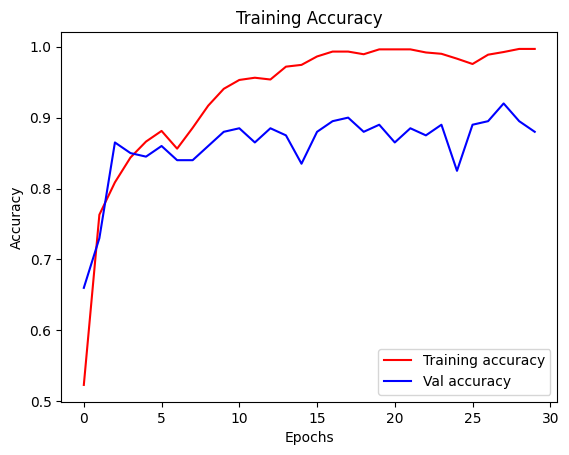

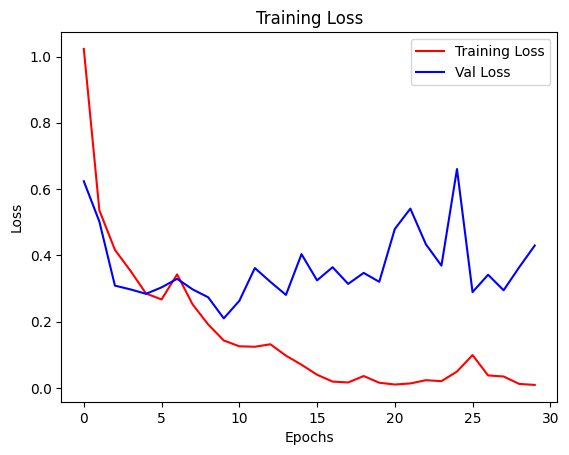

In [21]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()